<a href="https://colab.research.google.com/github/deiivid10/METODOS-NUMERICOS/blob/main/Nodos%20de%20Chebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Codigo que calcula n nodos de Chebyshev en [a,b].
Usarlo para interpolar la funcion de Runge en [-1,1]


Nodos de Chebyshev para n = 7:
x_1 = 0.97492791
x_2 = 0.78183148
x_3 = 0.43388374
x_4 = 0.00000000
x_5 = -0.43388374
x_6 = -0.78183148
x_7 = -0.97492791

Polinomio de Lagrange (n=7):
        6             5         4            3         2
-6.792 x + 7.327e-15 x + 12.16 x + 1.11e-15 x - 6.429 x + 1.731e-15 x + 1

Nodos de Chebyshev para n = 9:
x_1 = 0.98480775
x_2 = 0.86602540
x_3 = 0.64278761
x_4 = 0.34202014
x_5 = 0.00000000
x_6 = -0.34202014
x_7 = -0.64278761
x_8 = -0.86602540
x_9 = -0.98480775

Polinomio de Lagrange (n=9):
       8            7         6             5         4             3
17.62 x - 2.64e-14 x - 40.35 x + 6.745e-15 x + 31.35 x - 1.638e-15 x
          2
 - 9.513 x + 2.223e-15 x + 1

Nodos de Chebyshev para n = 11:
x_1 = 0.98982144
x_2 = 0.90963200
x_3 = 0.75574957
x_4 = 0.54064082
x_5 = 0.28173256
x_6 = 0.00000000
x_7 = -0.28173256
x_8 = -0.54064082
x_9 = -0.75574957
x_10 = -0.90963200
x_11 = -0.98982144

Polinomio de Lagrange (n=11):
        10             9    

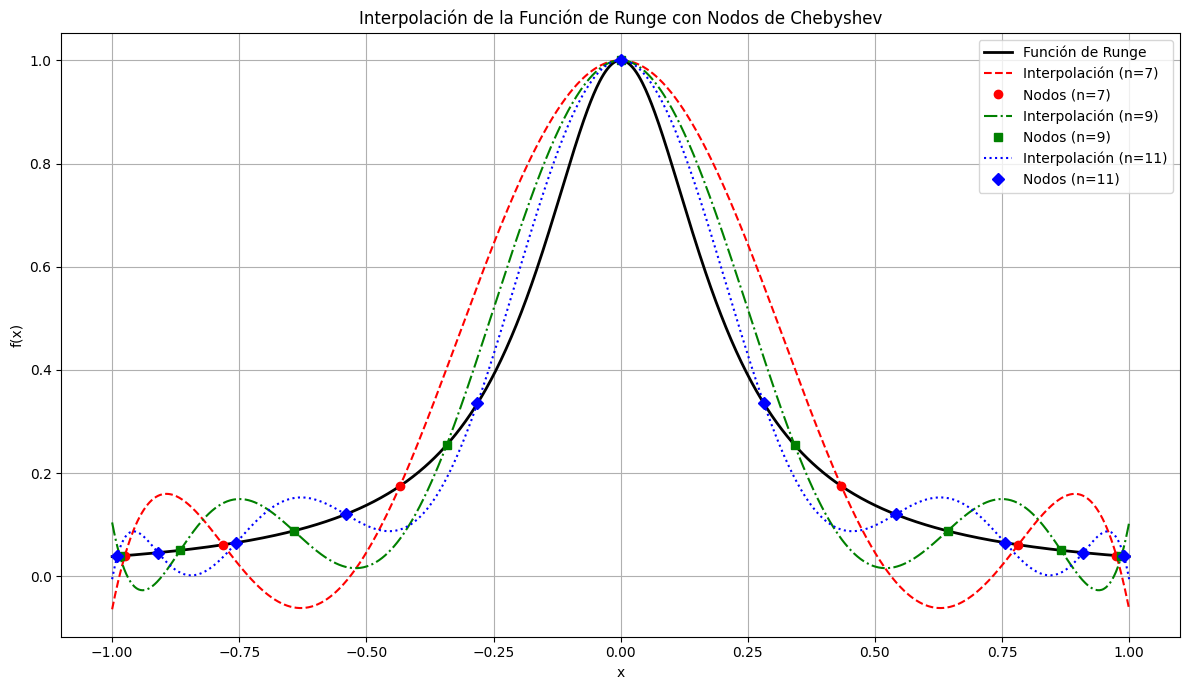

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Función de Runge
def runge(x):
    return 1 / (1 + 25 * x**2)

# Nodos de Chebyshev en [a, b]
def chebyshev_nodes(n, a, b):
    k = np.arange(1, n + 1)
    x_cheb = np.cos((2 * k - 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb

# Intervalo y evaluación fina
a, b = -1, 1
x_plot = np.linspace(a, b, 1000)
f_plot = runge(x_plot)

# Estilos
colors = {7: 'red', 9: 'green', 11: 'blue'}
linestyles = {7: '--', 9: '-.', 11: ':'}
markers = {7: 'o', 9: 's', 11: 'D'}

# Crear la figura
plt.figure(figsize=(12, 7))
plt.plot(x_plot, f_plot, 'k-', label='Función de Runge', linewidth=2)

# Interpolaciones
for n in [7, 9, 11]:
    x_nodes = chebyshev_nodes(n, a, b)
    y_nodes = runge(x_nodes)
    P = lagrange(x_nodes, y_nodes)
    y_interp = P(x_plot)

    # Imprimir nodos
    print(f"\nNodos de Chebyshev para n = {n}:")
    for i, x in enumerate(x_nodes):
        print(f"x_{i+1} = {x:.8f}")

    # Imprimir polinomio
    print(f"\nPolinomio de Lagrange (n={n}):")
    print(np.poly1d(P))

    # Graficar interpolación y nodos
    plt.plot(x_plot, y_interp, linestyle=linestyles[n], color=colors[n],
             label=f'Interpolación (n={n})')
    plt.plot(x_nodes, y_nodes, marker=markers[n], linestyle='None',
             color=colors[n], label=f'Nodos (n={n})')

# Configuración de la gráfica
plt.title('Interpolación de la Función de Runge con Nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#🔹EXPLICACION DEL CODIGO PASO A PASO

# Librerias
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.interpolate import lagrange

🔹**Su utilidad de las librerias:**

↑ **numpy: para operaciones numéricas.**

↑ **matplotlib.pyplot: para graficar.**

↑ **scipy.interpolate: para construir polinomios de Lagrange.**



#Aqui definimos la Función de Runge

    def runge(x):
    return 1 / (1 + 25 * x**2)


# Nodos de Chebyshev en [a, b]

    def chebyshev_nodes(n, a, b):
    k = np.arange(1, n + 1)
    x_cheb = np.cos((2 * k - 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb

🔹 **Calcula los nodos en [−1,1] usando el coseno.**

🔹 **Luego los transforma al intervalo [a,b] con una fórmula de cambio de escala lineal.**



# Intervalo y evaluación fina
    a, b = -1, 1
    x_plot = np.linspace(a, b, 1000)
    f_plot = runge(x_plot)

🔹 **El intervalo de trabajo,**  

↑ **x_plot: una malla fina de 1000 puntos entre [-1,1]**

↑ **f_plot:valores de la función de Runge evaluados en esa malla, para graficar la curva exacta.**




# Estilos
    colors = {7: 'red', 9: 'green', 11: 'blue'}
    linestyles = {7: '--', 9: '-.', 11: ':'}
    markers = {7: 'o', 9: 's', 11: 'D'}

🔹**Define los estilos gráficos para cada 𝑛:**

↑ **Colores diferentes para cada interpolación,**

↑ **Tipos de línea distintos (--, -., :),**

↑ **Distintos símbolos de nodos (o, s, D).**

# Crear la figura
    plt.figure(figsize=(12, 7))
    plt.plot(x_plot, f_plot, 'k-', label='Función de Runge', linewidth=2)

🔹*Inicia una figura de tamaño 12x7,**

↑ **Dibuja la función original de Runge en negro ('k-').**


# Interpolaciones
    for n in [7, 9, 11]:

🔹 **Inicia un bucle para n = 7, 9, 11: se harán tres interpolaciones distintas.**

    x_nodes = chebyshev_nodes(n, a, b)
    y_nodes = runge(x_nodes)

🔹 Calcula:

**Los nodos de Chebyshev para este n,**

**Evalúa la función de Runge en esos nodos.**

    P = lagrange(x_nodes, y_nodes)
    y_interp = P(x_plot)
↑ **Construye el polinomio de Lagrange usando los nodos,**

↑ **Evalúa el polinomio interpolador en la malla fina para graficarlo.**


    print(f"\nNodos de Chebyshev para n = {n}:")
    for i, x in enumerate(x_nodes):
        print(f"x_{i+1} = {x:.8f}")

↑ **Imprime los nodos usados para cada n**

    print(f"\nPolinomio de Lagrange (n={n}):")
    print(np.poly1d(P))

↑ **Imprime el polinomio interpolador como un objeto poly1d, que lo presenta con coeficientes estándar (orden decreciente).**

    plt.plot(x_plot, y_interp, linestyle=linestyles[n], color=colors[n],
    label=f'Interpolación (n={n})')

↑ **Dibuja la curva del polinomio interpolante en la gráfica principal.**


    plt.plot(x_nodes, y_nodes, marker=markers[n], linestyle='None',
    color=colors[n], label=f'Nodos (n={n})')

↑ **Añade los nodos como puntos con su color y símbolo correspondiente.**



# Configuración de la gráfica
    plt.title('Interpolación de la Función de Runge con Nodos de Chebyshev')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

🔹**Finaliza la figura:**

↑ **Añade título, etiquetas, malla y leyenda,**

↑ **Usa tight_layout() para ajustar los márgenes,**

↑ **Muestra la figura con plt.show().**
